In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as npr

import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.optimizers as opt

from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

np.random.seed(69420)

2023-04-05 15:00:41.915753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


XGBoost version: 1.7.3


## Creating a dataset
We created a dataset which features a sine wave, a square and a circle to classify

In [2]:
def classify(a,b):
    r=0
    if (b > np.sin(2*a)+a) or (a > 8 and b < 2):
        r=1
    if ((a-2)**2 + (b-8)**2 < 1):
        r=0
    return int(r)

In [3]:
N=5000
X = 10*npr.rand(N,2)
y = np.zeros(N)
for i in range(N):
    y[i]=classify(X[i,0],X[i,1])

Text(0.5, 1.0, 'Data')

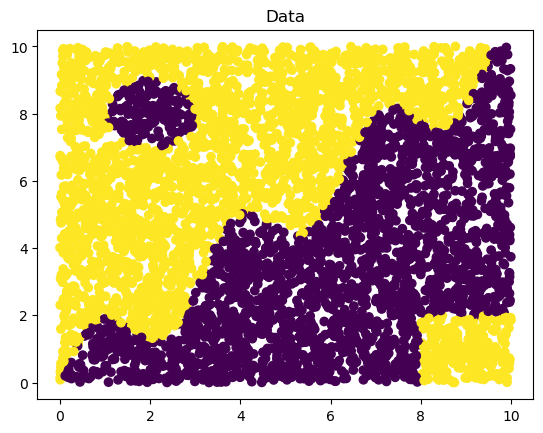

In [4]:
fig, AX = plt.subplots()

AX.scatter(X[:, 0], X[:, 1], c=y)
AX.set_title('Data')

In [5]:
permutation = np.random.permutation(X.shape[0])

train_percentage=0.8
tsize = int(train_percentage*N)

X = X[permutation]
y = y[permutation]

X_train, X_valid = X[:tsize], X[tsize:]
y_train, y_valid = y[:tsize], y[tsize:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0. 1.]
Frequencies in training dataset:  [1994 2006]


## DNN
We'll use as a starting point the model we optimnized for the first laboratory exercise

In [6]:
model = Sequential()
model.add(Dense(20,input_shape=(2,),activation='relu')) 
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))
nepoch=500

print(model.summary())

model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,341
Trainable params: 1,341
Non-trainabl

2023-04-05 15:00:45.740043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
fit = model.fit(X_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(X_valid,y_valid),
               verbose=1)

Epoch 1/500
80/80 [==============================] - 1s 2ms/step - loss: 0.5674 - accuracy: 0.7745 - val_loss: 0.4316 - val_accuracy: 0.8670
Epoch 2/500
80/80 [==============================] - 0s 967us/step - loss: 0.4109 - accuracy: 0.8508 - val_loss: 0.3767 - val_accuracy: 0.8580
Epoch 3/500
80/80 [==============================] - 0s 975us/step - loss: 0.3659 - accuracy: 0.8555 - val_loss: 0.3494 - val_accuracy: 0.8670
Epoch 4/500
80/80 [==============================] - 0s 940us/step - loss: 0.3403 - accuracy: 0.8640 - val_loss: 0.3268 - val_accuracy: 0.8680
Epoch 5/500
80/80 [==============================] - 0s 964us/step - loss: 0.3253 - accuracy: 0.8652 - val_loss: 0.2967 - val_accuracy: 0.8810
Epoch 6/500
80/80 [==============================] - 0s 955us/step - loss: 0.3052 - accuracy: 0.8730 - val_loss: 0.2795 - val_accuracy: 0.8850
Epoch 7/500
80/80 [==============================] - 0s 944us/step - loss: 0.2903 - accuracy: 0.8735 - val_loss: 0.2721 - val_accuracy: 0.8870
E

80/80 [==============================] - 0s 906us/step - loss: 0.1761 - accuracy: 0.9122 - val_loss: 0.1640 - val_accuracy: 0.9230
Epoch 59/500
80/80 [==============================] - 0s 889us/step - loss: 0.1744 - accuracy: 0.9218 - val_loss: 0.1652 - val_accuracy: 0.9210
Epoch 60/500
80/80 [==============================] - 0s 871us/step - loss: 0.1721 - accuracy: 0.9178 - val_loss: 0.1781 - val_accuracy: 0.9150
Epoch 61/500
80/80 [==============================] - 0s 874us/step - loss: 0.1724 - accuracy: 0.9165 - val_loss: 0.1546 - val_accuracy: 0.9290
Epoch 62/500
80/80 [==============================] - 0s 863us/step - loss: 0.1756 - accuracy: 0.9180 - val_loss: 0.1654 - val_accuracy: 0.9260
Epoch 63/500
80/80 [==============================] - 0s 880us/step - loss: 0.1751 - accuracy: 0.9197 - val_loss: 0.1543 - val_accuracy: 0.9290
Epoch 64/500
80/80 [==============================] - 0s 861us/step - loss: 0.1702 - accuracy: 0.9187 - val_loss: 0.1531 - val_accuracy: 0.9250
Epoch

Epoch 115/500
80/80 [==============================] - 0s 870us/step - loss: 0.1344 - accuracy: 0.9370 - val_loss: 0.1242 - val_accuracy: 0.9450
Epoch 116/500
80/80 [==============================] - 0s 867us/step - loss: 0.1280 - accuracy: 0.9398 - val_loss: 0.1365 - val_accuracy: 0.9330
Epoch 117/500
80/80 [==============================] - 0s 856us/step - loss: 0.1342 - accuracy: 0.9367 - val_loss: 0.1460 - val_accuracy: 0.9310
Epoch 118/500
80/80 [==============================] - 0s 880us/step - loss: 0.1430 - accuracy: 0.9360 - val_loss: 0.1388 - val_accuracy: 0.9360
Epoch 119/500
80/80 [==============================] - 0s 880us/step - loss: 0.1324 - accuracy: 0.9445 - val_loss: 0.1239 - val_accuracy: 0.9450
Epoch 120/500
80/80 [==============================] - 0s 865us/step - loss: 0.1340 - accuracy: 0.9355 - val_loss: 0.1399 - val_accuracy: 0.9280
Epoch 121/500
80/80 [==============================] - 0s 858us/step - loss: 0.1305 - accuracy: 0.9435 - val_loss: 0.1278 - val_ac

80/80 [==============================] - 0s 875us/step - loss: 0.1086 - accuracy: 0.9517 - val_loss: 0.1101 - val_accuracy: 0.9570
Epoch 172/500
80/80 [==============================] - 0s 879us/step - loss: 0.1013 - accuracy: 0.9563 - val_loss: 0.0978 - val_accuracy: 0.9600
Epoch 173/500
80/80 [==============================] - 0s 864us/step - loss: 0.1006 - accuracy: 0.9542 - val_loss: 0.1071 - val_accuracy: 0.9530
Epoch 174/500
80/80 [==============================] - 0s 857us/step - loss: 0.1122 - accuracy: 0.9503 - val_loss: 0.0959 - val_accuracy: 0.9600
Epoch 175/500
80/80 [==============================] - 0s 886us/step - loss: 0.0945 - accuracy: 0.9585 - val_loss: 0.0954 - val_accuracy: 0.9600
Epoch 176/500
80/80 [==============================] - 0s 860us/step - loss: 0.0963 - accuracy: 0.9585 - val_loss: 0.1011 - val_accuracy: 0.9530
Epoch 177/500
80/80 [==============================] - 0s 860us/step - loss: 0.1051 - accuracy: 0.9528 - val_loss: 0.1068 - val_accuracy: 0.9530

80/80 [==============================] - 0s 891us/step - loss: 0.0743 - accuracy: 0.9722 - val_loss: 0.0580 - val_accuracy: 0.9780
Epoch 228/500
80/80 [==============================] - 0s 871us/step - loss: 0.0711 - accuracy: 0.9705 - val_loss: 0.0602 - val_accuracy: 0.9770
Epoch 229/500
80/80 [==============================] - 0s 869us/step - loss: 0.0735 - accuracy: 0.9712 - val_loss: 0.0586 - val_accuracy: 0.9770
Epoch 230/500
80/80 [==============================] - 0s 863us/step - loss: 0.0769 - accuracy: 0.9703 - val_loss: 0.0694 - val_accuracy: 0.9720
Epoch 231/500
80/80 [==============================] - 0s 871us/step - loss: 0.0788 - accuracy: 0.9682 - val_loss: 0.0581 - val_accuracy: 0.9780
Epoch 232/500
80/80 [==============================] - 0s 883us/step - loss: 0.0729 - accuracy: 0.9722 - val_loss: 0.0692 - val_accuracy: 0.9720
Epoch 233/500
80/80 [==============================] - 0s 864us/step - loss: 0.0675 - accuracy: 0.9725 - val_loss: 0.0653 - val_accuracy: 0.9740

Epoch 284/500
80/80 [==============================] - 0s 879us/step - loss: 0.0638 - accuracy: 0.9737 - val_loss: 0.0505 - val_accuracy: 0.9800
Epoch 285/500
80/80 [==============================] - 0s 866us/step - loss: 0.0673 - accuracy: 0.9722 - val_loss: 0.0641 - val_accuracy: 0.9700
Epoch 286/500
80/80 [==============================] - 0s 864us/step - loss: 0.0631 - accuracy: 0.9755 - val_loss: 0.1007 - val_accuracy: 0.9580
Epoch 287/500
80/80 [==============================] - 0s 869us/step - loss: 0.0722 - accuracy: 0.9728 - val_loss: 0.0610 - val_accuracy: 0.9770
Epoch 288/500
80/80 [==============================] - 0s 887us/step - loss: 0.0523 - accuracy: 0.9812 - val_loss: 0.0415 - val_accuracy: 0.9840
Epoch 289/500
80/80 [==============================] - 0s 867us/step - loss: 0.0666 - accuracy: 0.9743 - val_loss: 0.0485 - val_accuracy: 0.9810
Epoch 290/500
80/80 [==============================] - 0s 861us/step - loss: 0.0547 - accuracy: 0.9795 - val_loss: 0.0538 - val_ac

80/80 [==============================] - 0s 870us/step - loss: 0.0470 - accuracy: 0.9815 - val_loss: 0.0497 - val_accuracy: 0.9760
Epoch 341/500
80/80 [==============================] - 0s 874us/step - loss: 0.0650 - accuracy: 0.9753 - val_loss: 0.0396 - val_accuracy: 0.9850
Epoch 342/500
80/80 [==============================] - 0s 861us/step - loss: 0.0545 - accuracy: 0.9775 - val_loss: 0.0565 - val_accuracy: 0.9750
Epoch 343/500
80/80 [==============================] - 0s 876us/step - loss: 0.0618 - accuracy: 0.9745 - val_loss: 0.0474 - val_accuracy: 0.9750
Epoch 344/500
80/80 [==============================] - 0s 859us/step - loss: 0.0739 - accuracy: 0.9730 - val_loss: 0.0732 - val_accuracy: 0.9680
Epoch 345/500
80/80 [==============================] - 0s 887us/step - loss: 0.0726 - accuracy: 0.9693 - val_loss: 0.0527 - val_accuracy: 0.9770
Epoch 346/500
80/80 [==============================] - 0s 867us/step - loss: 0.0474 - accuracy: 0.9822 - val_loss: 0.0485 - val_accuracy: 0.9790

80/80 [==============================] - 0s 880us/step - loss: 0.0662 - accuracy: 0.9735 - val_loss: 0.0416 - val_accuracy: 0.9810
Epoch 397/500
80/80 [==============================] - 0s 871us/step - loss: 0.0446 - accuracy: 0.9843 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 398/500
80/80 [==============================] - 0s 859us/step - loss: 0.0456 - accuracy: 0.9827 - val_loss: 0.0619 - val_accuracy: 0.9740
Epoch 399/500
80/80 [==============================] - 0s 861us/step - loss: 0.0568 - accuracy: 0.9785 - val_loss: 0.0408 - val_accuracy: 0.9820
Epoch 400/500
80/80 [==============================] - 0s 874us/step - loss: 0.0483 - accuracy: 0.9808 - val_loss: 0.0596 - val_accuracy: 0.9760
Epoch 401/500
80/80 [==============================] - 0s 880us/step - loss: 0.0496 - accuracy: 0.9812 - val_loss: 0.0390 - val_accuracy: 0.9840
Epoch 402/500
80/80 [==============================] - 0s 854us/step - loss: 0.0597 - accuracy: 0.9768 - val_loss: 0.0689 - val_accuracy: 0.9710

80/80 [==============================] - 0s 880us/step - loss: 0.0397 - accuracy: 0.9825 - val_loss: 0.0384 - val_accuracy: 0.9850
Epoch 453/500
80/80 [==============================] - 0s 886us/step - loss: 0.0570 - accuracy: 0.9783 - val_loss: 0.0502 - val_accuracy: 0.9760
Epoch 454/500
80/80 [==============================] - 0s 874us/step - loss: 0.0581 - accuracy: 0.9770 - val_loss: 0.0522 - val_accuracy: 0.9760
Epoch 455/500
80/80 [==============================] - 0s 867us/step - loss: 0.0549 - accuracy: 0.9772 - val_loss: 0.0358 - val_accuracy: 0.9910
Epoch 456/500
80/80 [==============================] - 0s 868us/step - loss: 0.0437 - accuracy: 0.9825 - val_loss: 0.0671 - val_accuracy: 0.9710
Epoch 457/500
80/80 [==============================] - 0s 857us/step - loss: 0.0468 - accuracy: 0.9815 - val_loss: 0.0381 - val_accuracy: 0.9850
Epoch 458/500
80/80 [==============================] - 0s 878us/step - loss: 0.0440 - accuracy: 0.9810 - val_loss: 0.0271 - val_accuracy: 0.9920

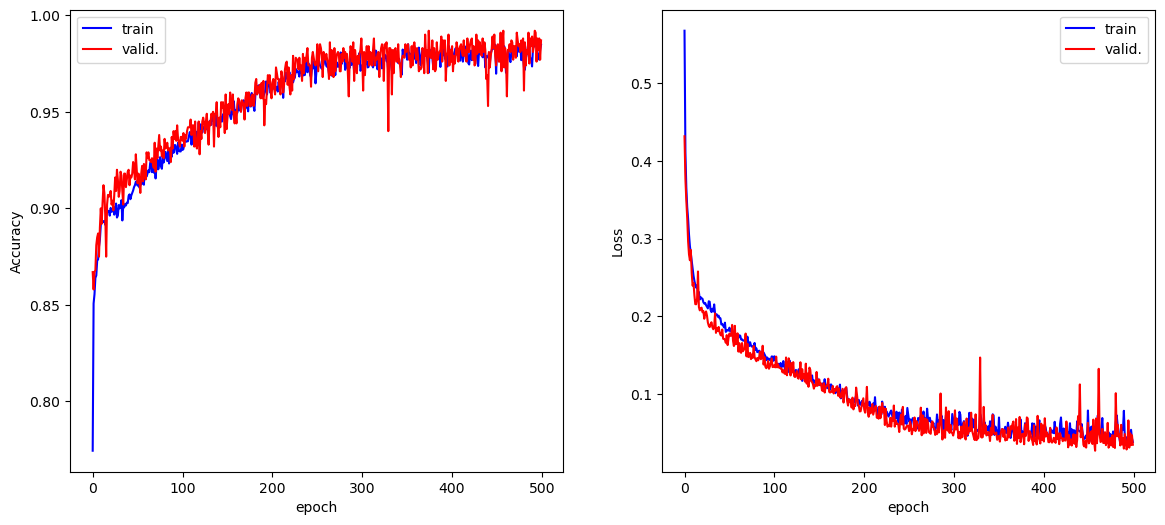

In [8]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [9]:

v=np.linspace(0,10,1000)
grid = 10*npr.rand(N,2)
#grid = np.reshape(np.meshgrid(v,v), (1000,1000,2)) 
pred = model.predict(grid)

157/157 [==============================] - 0s 407us/step


<function matplotlib.pyplot.show(close=None, block=None)>

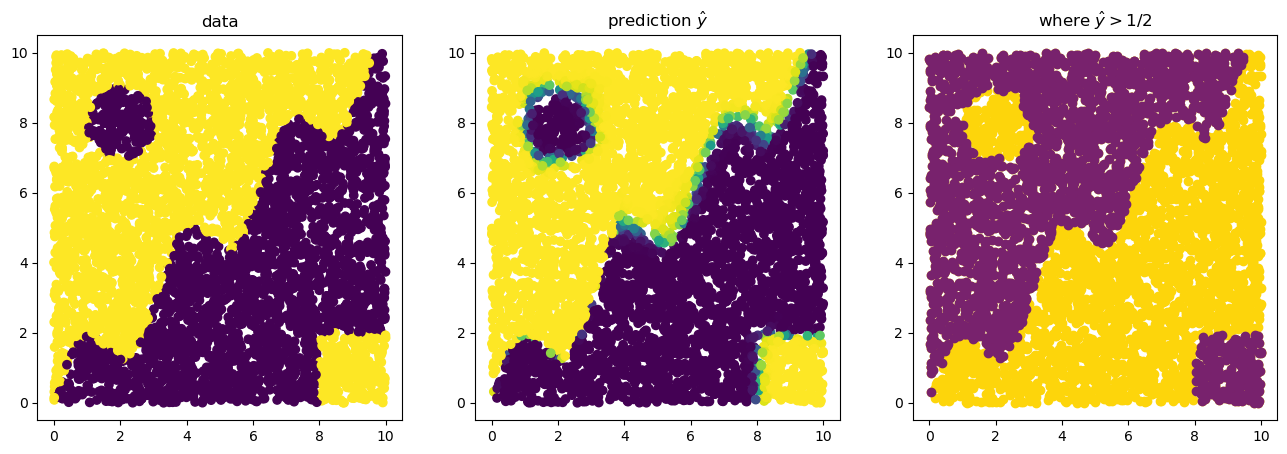

In [10]:
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(X[:,0],X[:,1],c=y)
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#FDD50B")
ax.scatter(grid[W1,0],grid[W1,1],c="#78226D")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

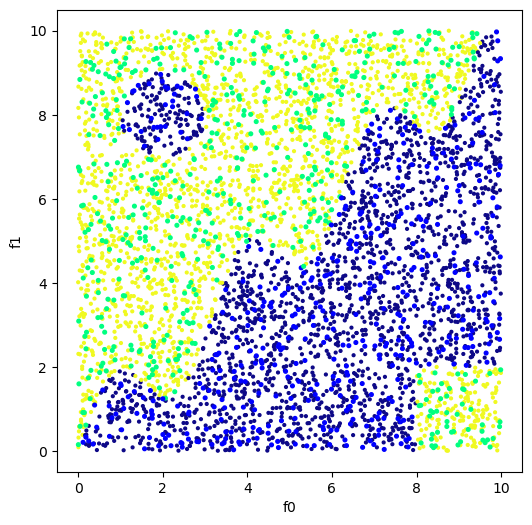

In [11]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

plt.figure(figsize=(6,6))
scat(X_train,y_train)
scat(X_valid,y_valid,cmap="winter",s=7)
plt.show()

In [12]:
def classifyx(clf=GradientBoostingClassifier(),show=False):
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_valid)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(X_valid, y_valid))))

    dx = 0.02
    x_seq=np.arange(0,10+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot = clf.predict(x_plot)
    
    plt.figure(figsize=(6,6))
    plt.title(str(clf))
    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(X_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 1.80%


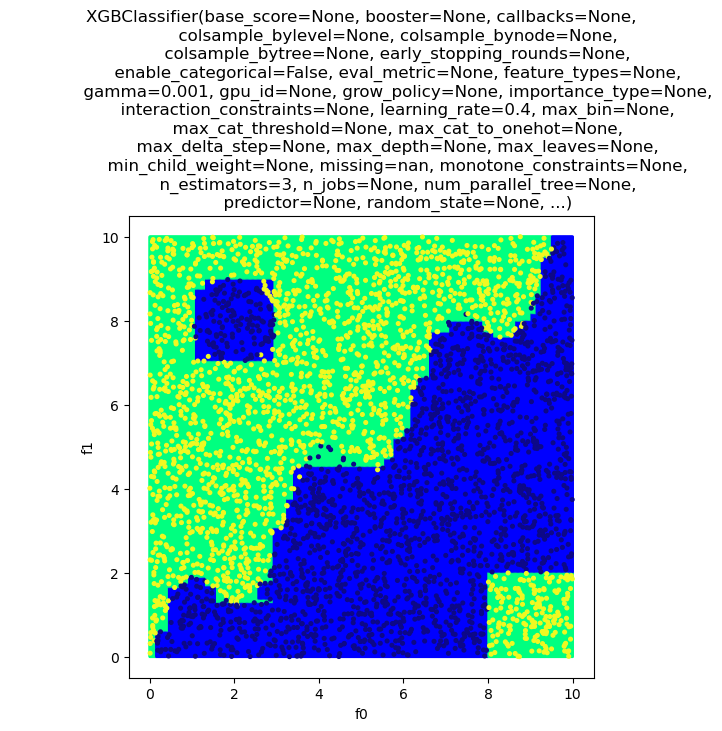

In [14]:
classifyx(XGBClassifier(seed=1,
                        objective='binary:logistic',
                        #objective="reg:squarederror",eval_metric="rmse",
                        learning_rate=0.4,
                        gamma=0.001,
                        reg_lambda=0.001, n_estimators=3),show=False)

In [15]:
Ns=[i for i in range(0,N+N//10, N//10)][1:]
nn_err=[]
xgb_err=[]
for i in Ns:
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    X0=X[:i]
    y0=y[:i]
    
    
    train_percentage=0.8
    tsize = int(train_percentage*i)
    
    
    X_train, X_valid = X0[:tsize], X0[tsize:]
    y_train, y_valid = y0[:tsize], y0[tsize:]
    model = Sequential()
    model.add(Dense(20,input_shape=(2,),activation='relu')) 
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
    
    #print(model.summary())
    
    model.compile(loss='binary_crossentropy',
                  #optimizer='RMSprop',
                  optimizer='adam',
                  metrics=['accuracy'])
    fit = model.fit(X_train, y_train,
                   epochs = nepoch, batch_size = 50,
                   validation_data=(X_valid,y_valid),
                   verbose=0)
    nn_err.append(1-fit.history["val_accuracy"][-1])
    clf = XGBClassifier(seed=1,
                        objective='binary:logistic',
                        #objective="reg:squarederror",eval_metric="rmse",
                        learning_rate=0.4,
                        gamma=1,
                        reg_lambda=0.001, n_estimators=3)
    clf.fit(X_train,y_train)
    
    xgb_err.append(1-clf.score(X_valid, y_valid))
    print('Completed training with N=', i)


500
1000
1500
2000
2500
3000
3500
4000
4500
5000


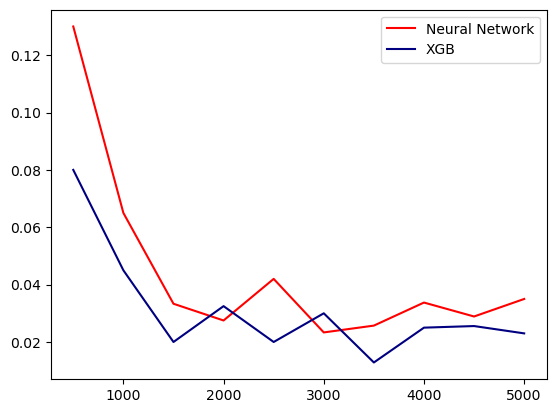

In [18]:
plt.plot(Ns, nn_err, color="red", label='Neural Network')
plt.plot(Ns, xgb_err, color="navy", label='XGB')
plt.legend()